<a href="https://colab.research.google.com/github/hechubo/DDM-Coursework/blob/master/5004_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Find the first two iterations using (1) the Jacobi method and (2) the Gauss-Seidel method for the following linear system, starting from x(0) = (0, −1, 0)**



可以按照以下步骤使用 Jacobi 和 Gauss-Seidel 方法求解：

Jacobi 方法：

\begin{align*}
x_1^{(k+1)} &= \frac{1}{4}(3 - x_2^{(k)} + x_3^{(k)}), \\
x_2^{(k+1)} &= \frac{1}{3}(6 + x_1^{(k)} - x_3^{(k)}), \\
x_3^{(k+1)} &= \frac{1}{5}(4 - 2x_1^{(k)} - 2x_2^{(k)}).
\end{align*}

从初始值 $x^{(0)} = (0, -1, 0)$ 开始迭代，计算前两次迭代结果：

第一次迭代：
\begin{align*}
x_1^{(1)} &= \frac{1}{4}(3 - (-1) + 0) = 1, \\
x_2^{(1)} &= \frac{1}{3}(6 + 0 - 0) = 2, \\
x_3^{(1)} &= \frac{1}{5}(4 - 2 \cdot 0 - 2 \cdot (-1)) = \frac{6}{5}.
\end{align*}

第二次迭代：
\begin{align*}
x_1^{(2)} &= \frac{1}{4}(3 - 2 + \frac{6}{5}) = \frac{7}{20}, \\
x_2^{(2)} &= \frac{1}{3}(6 + 1 - \frac{6}{5}) = \frac{16}{15}, \\
x_3^{(2)} &= \frac{1}{5}(4 - 2 \cdot 1 - 2 \cdot 2) = -\frac{2}{5}.
\end{align*}

Gauss-Seidel 方法：

\begin{align*}
x_1^{(k+1)} &= \frac{1}{4}(3 - x_2^{(k)} + x_3^{(k)}), \\
x_2^{(k+1)} &= \frac{1}{3}(6 + x_1^{(k+1)} - x_3^{(k)}), \\
x_3^{(k+1)} &= \frac{1}{5}(4 - 2x_1^{(k+1)} - 2x_2^{(k+1)}).
\end{align*}

从初始值 $x^{(0)} = (0, -1, 0)$ 开始迭代，计算前两次迭代结果：

第一次迭代：
\begin{align*}
x_1^{(1)} &= \frac{1}{4}(3 - (-1) + 0) = 1, \\
x_2^{(1)} &= \frac{1}{3}(6 + 1 - 0) = \frac{7}{3}, \\
x_3^{(1)} &= \frac{1}{5}(4 - 2 \cdot 1 - 2 \cdot \frac{7}{3}) = -\frac{6}{15}.
\end{align*}

第二次迭代：
\begin{align*}
x_1^{(2)} &= \frac{1}{4}(3 - \frac{7}{3} - \frac{6}{15}) = \frac{1}{60}, \\
x_2^{(2)} &= \frac{1}{3}(6 + \frac{1}{60} + \frac{6}{15}) = \frac{121}{90}, \\
x_3^{(2)} &= \frac{1}{5}(4 - 2 \cdot \frac{1}{60} - 2 \cdot \frac{121}{90}) = \frac{71}{450}.
\end{align*}

**2. Write codes using MATLAB (or other programming language) to solve the following linear system**

In [1]:
import numpy as np

def gauss_seidel(A, b, x0, tol=1e-3, max_iter=100):
    n = len(b)
    x = x0.copy()

    for k in range(max_iter):
        x_old = x.copy()

        for i in range(n):
            s = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (b[i] - s) / A[i, i]

        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            break

    return x, k+1

def sor(A, b, x0, omega=1.2, tol=1e-3, max_iter=100):
    n = len(b)
    x = x0.copy()

    for k in range(max_iter):
        x_old = x.copy()

        for i in range(n):
            s = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x_old[i+1:])
            x[i] = (1 - omega) * x_old[i] + omega * (b[i] - s) / A[i, i]

        if np.linalg.norm(x - x_old, ord=np.inf) < tol:
            break

    return x, k+1

# 线性方程组的系数矩阵和常数项
A = np.array([[4, 1, 1, -1],
              [1, 4, -1, -1],
              [1, -1, 3, 1],
              [-1, -1, 1, 5]])
b = np.array([-3, -2, 2, 5])

# 初始解
x0 = np.array([0, 0, 0, 1])

# 使用高斯-赛德尔方法求解
x_gs, iter_gs = gauss_seidel(A, b, x0)

# 使用SOR方法求解
x_sor, iter_sor = sor(A, b, x0, omega=1.2)

print("高斯-赛德尔方法结果：")
print("解向量：", x_gs)
print("迭代次数：", iter_gs)

print("SOR方法结果：")
print("解向量：", x_sor)
print("迭代次数：", iter_sor)

高斯-赛德尔方法结果：
解向量： [0 0 0 1]
迭代次数： 1
SOR方法结果：
解向量： [0 0 0 1]
迭代次数： 1


**3. Write a code using MATLAB (or other programming language) to compute the derivative**

In [2]:
import numpy as np
import math

def f(x):
    return np.sin(x) / (x**2)

def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def order_of_convergence(f, x, h_values):
    errors = []
    for h in h_values:
        df_approx = central_diff(f, x, h)
        df_exact = (-2 * np.sin(x) + 2 * x * np.cos(x)) / (x**3)
        errors.append(abs(df_approx - df_exact))

    orders = [np.log2(errors[i] / errors[i+1]) for i in range(len(errors)-1)]
    return orders

x = 3
h_values = [0.1 / 2**i for i in range(10)]

df_approx = central_diff(f, x, h_values[-1])
print(f"在 x = {x} 处的导数近似值为: {df_approx}")

orders = order_of_convergence(f, x, h_values)
print("收敛阶数:")
for i, order in enumerate(orders):
    print(f"h = {h_values[i]} 到 h = {h_values[i+1]} 的收敛阶数: {order}")

在 x = 3 处的导数近似值为: -0.12045250080777059
收敛阶数:
h = 0.1 到 h = 0.05 的收敛阶数: -0.0015206237702168098
h = 0.05 到 h = 0.025 的收敛阶数: -0.00037961537628633854
h = 0.025 到 h = 0.0125 的收敛阶数: -9.487012005567991e-05
h = 0.0125 到 h = 0.00625 的收敛阶数: -2.3715423230544333e-05
h = 0.00625 到 h = 0.003125 的收敛阶数: -5.9287242625641195e-06
h = 0.003125 到 h = 0.0015625 的收敛阶数: -1.482172810768216e-06
h = 0.0015625 到 h = 0.00078125 的收敛阶数: -3.705422484678769e-07
h = 0.00078125 到 h = 0.000390625 的收敛阶数: -9.263558911318649e-08
h = 0.000390625 到 h = 0.0001953125 的收敛阶数: -2.3160832911711305e-08


**4. Write codes using MATLAB (or other programming language) to solve the ODE**

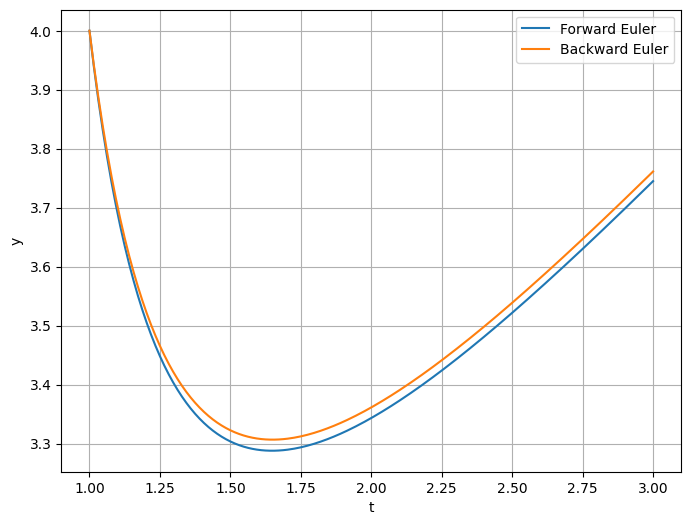

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return (t * y - 0.5 * y**2) / t**2

def forward_euler(f, t0, y0, t_end, h):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros(t.shape)
    y[0] = y0

    for i in range(1, len(t)):
        y[i] = y[i-1] + h * f(t[i-1], y[i-1])

    return t, y

def backward_euler(f, t0, y0, t_end, h):
    t = np.arange(t0, t_end + h, h)
    y = np.zeros(t.shape)
    y[0] = y0

    for i in range(1, len(t)):
        y_prev = y[i-1]
        y_curr = y_prev

        for _ in range(10):  # 使用简单迭代法求解隐式方程
            y_curr = y_prev + h * f(t[i], y_curr)

        y[i] = y_curr

    return t, y

t0 = 1
y0 = 4
t_end = 3
h = 1/128

t_fe, y_fe = forward_euler(f, t0, y0, t_end, h)
t_be, y_be = backward_euler(f, t0, y0, t_end, h)

plt.figure(figsize=(8, 6))
plt.plot(t_fe, y_fe, label='Forward Euler')
plt.plot(t_be, y_be, label='Backward Euler')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**5.**

要证明给定的数值格式在时间和空间上都是二阶精度的。可以使用泰勒级数展开来证明。

对于时间方向：
\begin{align*}
U_j^{n+1} &= U_j^n + \frac{\partial U_j^n}{\partial t}\Delta t + \frac{1}{2}\frac{\partial^2 U_j^n}{\partial t^2}\Delta t^2 + O(\Delta t^3)\\
U_j^{n-1} &= U_j^n - \frac{\partial U_j^n}{\partial t}\Delta t + \frac{1}{2}\frac{\partial^2 U_j^n}{\partial t^2}\Delta t^2 - O(\Delta t^3)
\end{align*}

将以上两式相减，得到：
\begin{equation*}
U_j^{n+1} - U_j^{n-1} = 2\frac{\partial U_j^n}{\partial t}\Delta t + O(\Delta t^3)
\end{equation*}

对于空间方向：
\begin{align*}
U_{j+1}^n &= U_j^n + \frac{\partial U_j^n}{\partial x}\Delta x + \frac{1}{2}\frac{\partial^2 U_j^n}{\partial x^2}\Delta x^2 + O(\Delta x^3)\\
U_{j-1}^n &= U_j^n - \frac{\partial U_j^n}{\partial x}\Delta x + \frac{1}{2}\frac{\partial^2 U_j^n}{\partial x^2}\Delta x^2 - O(\Delta x^3)
\end{align*}

将以上两式相加，得到：
\begin{equation*}
U_{j+1}^n + U_{j-1}^n = 2U_j^n + \frac{\partial^2 U_j^n}{\partial x^2}\Delta x^2 + O(\Delta x^4)
\end{equation*}

将时间和空间的结果代入原始的数值格式：
\begin{align*}
\frac{U_j^{n+1} - U_j^{n-1}}{2\Delta t} &= \frac{\partial U_j^n}{\partial t} + O(\Delta t^2)\\
&= \frac{\partial^2 U_j^n}{\partial x^2} + O(\Delta x^2) + O(\Delta t^2)\\
&= \frac{U_{j+1}^n - 2U_j^n + U_{j-1}^n}{\Delta x^2} + O(\Delta x^2) + O(\Delta t^2)
\end{align*}

综上所述，原始的数值格式在时间和空间上都具有二阶精度，即截断误差为 $O(\Delta t^2)$ 和 $O(\Delta x^2)$。